In [6]:
import sys
sys.path.append("../../src")

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [9]:
import data

In [49]:
# set db path hackily
data._get_connection("../../data/participants.db")

EXPERIMENT_ID = "07_comprehension_spray-load-construction-meaning-with-images"

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")]
image_response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-image-response-with-copout")]

In [50]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

print(f"Dropping {image_response_df.index.duplicated().sum()} dupe results.")
image_response_df = image_response_df[~image_response_df.index.duplicated()]

Dropping 0 dupe results.
Dropping 0 dupe results.


In [51]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

image_response_df = pd.concat([image_response_df,
                               image_response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                              axis=1) \
    .drop(columns="condition_id")

In [52]:
for df in [response_df, image_response_df]:
    # Convert condition_id to independent features
    df["theme_is_object"] = df["condition_0"] == 1
    df["location_is_heavy"] = df["condition_1"] == 1
    df["theme_is_heavy"] = df["condition_2"] == 1
    
    # dtype fixes
    df["dateTime"] = pd.to_datetime(df.dateTime, unit="ms")

In [53]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

response_df["slider_copout"] = response_df.slider_copout.astype(bool)

In [54]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,theme_is_object,location_is_heavy,theme_is_heavy,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
5,debugWG3ZVM:debugBDB6GC,0,0,debugBDB6GC,debugWG3ZVM,debug8WM17Q,html-slider-response-with-copout,2704.8,0.0-5.0,2021-10-08 16:30:05.193,07_comprehension_spray-load-construction-meani...,...,False,NaN,NaN,practice,fill,full,False,False,False,0.917556
6,debugWG3ZVM:debugBDB6GC,0,0,debugBDB6GC,debugWG3ZVM,debug8WM17Q,html-slider-response-with-copout,1862.2,0.0-6.0,2021-10-08 16:30:07.061,07_comprehension_spray-load-construction-meani...,...,False,NaN,NaN,practice,cover,empty,False,False,False,-1.645449
8,debugWG3ZVM:debugBDB6GC,0,0,debugBDB6GC,debugWG3ZVM,debug8WM17Q,html-slider-response-with-copout,1899.0,0.0-8.0,2021-10-08 16:30:09.918,07_comprehension_spray-load-construction-meani...,...,False,NaN,NaN,practice,cover,full,False,False,False,0.917556
11,debugWG3ZVM:debugBDB6GC,0,0,debugBDB6GC,debugWG3ZVM,debug8WM17Q,html-slider-response-with-copout,3802.3,0.0-11.0,2021-10-08 16:30:16.558,07_comprehension_spray-load-construction-meani...,...,False,NaN,NaN,filler,empty,NaN,False,False,False,-1.645449
12,debugWG3ZVM:debugBDB6GC,0,0,debugBDB6GC,debugWG3ZVM,debug8WM17Q,html-slider-response-with-copout,1780.5,0.0-12.0,2021-10-08 16:30:18.370,07_comprehension_spray-load-construction-meani...,...,False,NaN,NaN,1,0,0,True,False,False,0.917556


In [55]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [56]:
N = len(response_df.reset_index().uniqueid.unique())
N

1

### Demo

In [57]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:>

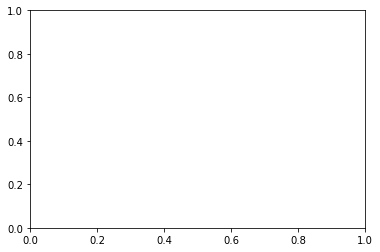

In [58]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int, errors="ignore")
sns.histplot(ages)

In [59]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Master's degree    1
Name: survey_answer, dtype: int64

In [60]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    1
Name: survey_answer, dtype: int64

### Comments

In [61]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['3', '']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

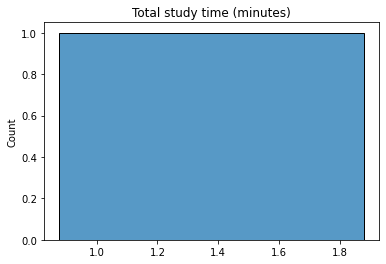

In [62]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [63]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    1.377915
std          NaN
Name: rt, dtype: float64

### Response times

In [64]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

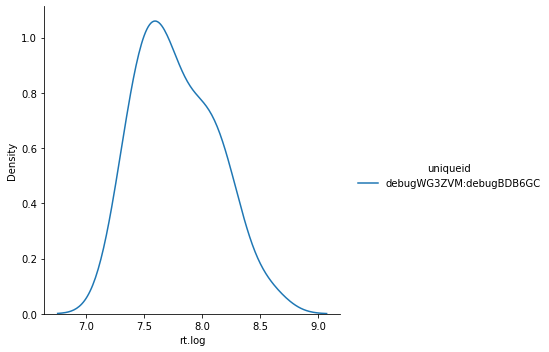

In [65]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [66]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

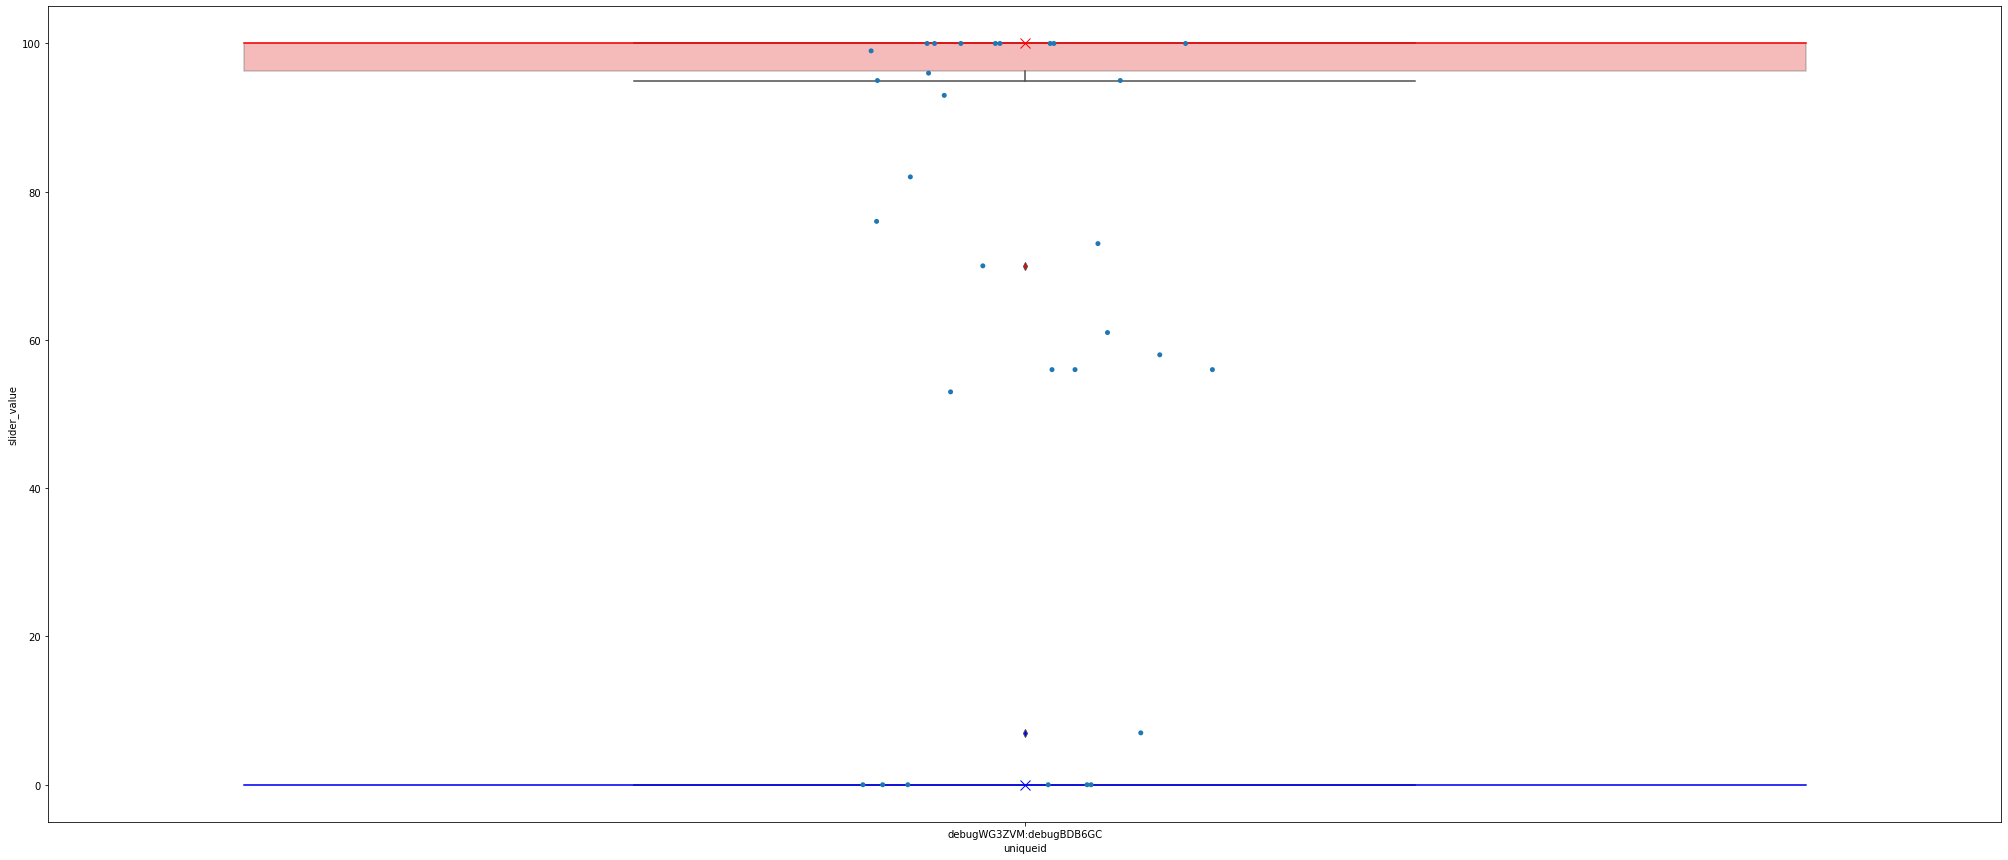

In [67]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [68]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-68-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-68-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [69]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = set()

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [70]:
practice_df.groupby("practice_id").match.mean()

practice_id
coverempty    True
coverfull     True
fillfull      True
Name: match, dtype: bool

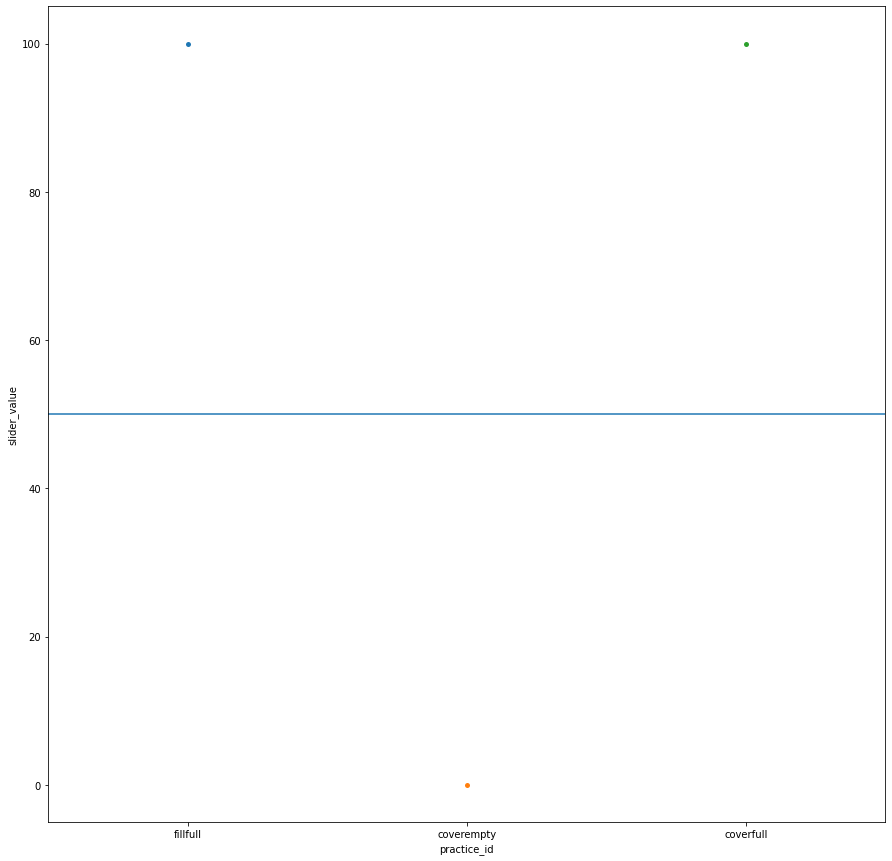

In [71]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [72]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
coverempty,False,1
coverfull,False,1
fillfull,False,1


### Fillers

<AxesSubplot:xlabel='t'>

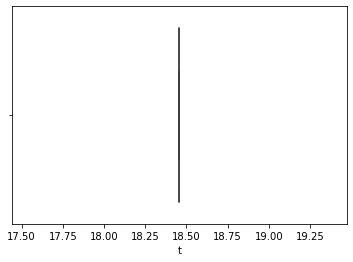

In [73]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [74]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
debugWG3ZVM:debugBDB6GC,18.457,4.697749e-09


#### Filler copouts

In [75]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
0.0,empty,False,0,1
1.0,empty,False,0,1
2.0,empty,False,0,1
3.0,empty,False,0,1
4.0,empty,False,0,1
5.0,empty,False,0,1
6.0,full,False,0,1
7.0,full,False,0,1
8.0,full,False,0,1


#### Filler failures by item

In [76]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-76-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [77]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        True
             1.0        True
             2.0        True
             3.0        True
             4.0        True
             5.0        True
full         6.0        True
             7.0        True
             8.0        True
             9.0        True
             10.0       True
             11.0       True
Name: match, dtype: bool

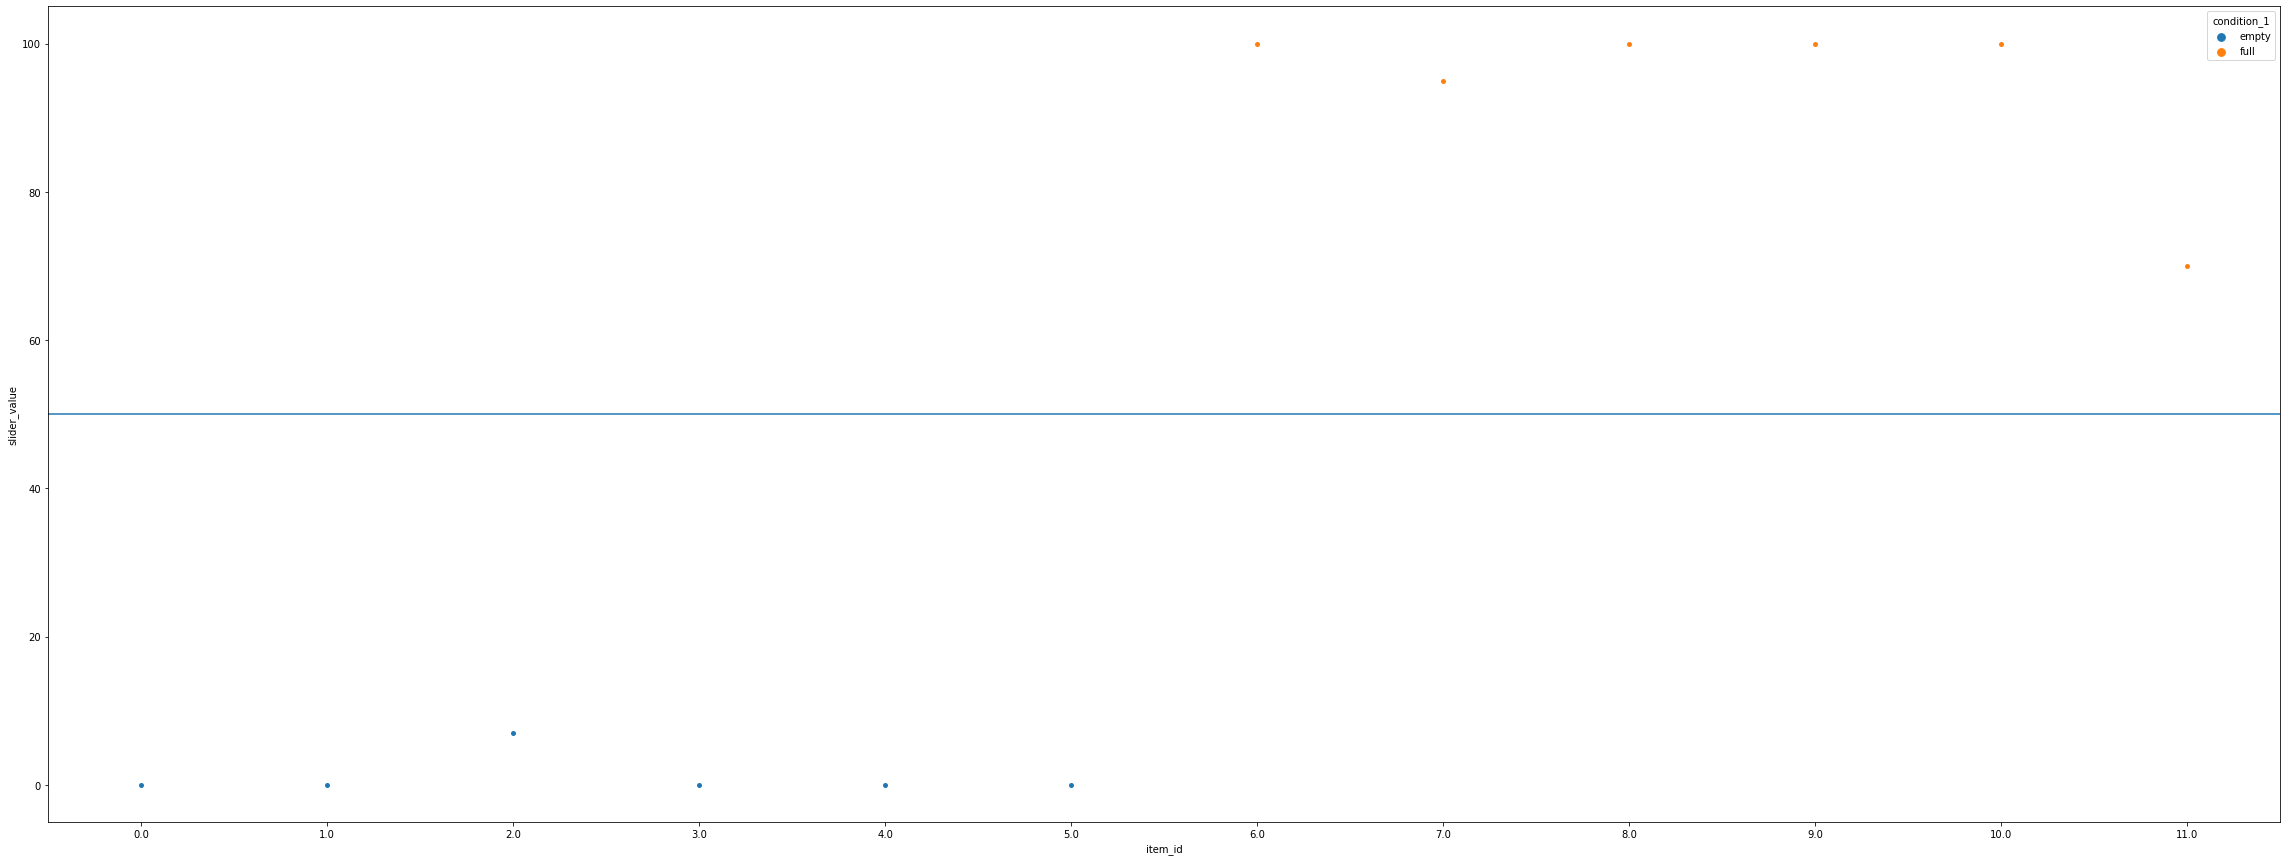

In [78]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [79]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]
exp_image_items = image_response_df[~(image_response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [80]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")
exp_image_items = exp_image_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")
exp_image_items = exp_image_items.drop(attention_drops.index, level="uniqueid")

0 subjects (0.0%) disqualified and dropped due to failed practice.
	
0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	


In [81]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

1 subjects remaining.


### Merge in materials

In [82]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [83]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "V pres", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)
merged_image_df = pd.merge(exp_image_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

#### Add frequency data

In [84]:
freqs = {}
with open("../../data/wikitext-2_train_vocab.txt") as f:
    for line in f:
        if line.strip():
            token, freq = line.strip().split("\t")
            freqs[token.strip()] = int(freq)

In [85]:
merged_df["V freq"] = merged_df["V pres"].map(freqs)

### Filter out items which were dropped in later materials iterations

In [86]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, spray-load-003-images.


### Export

In [87]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [88]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

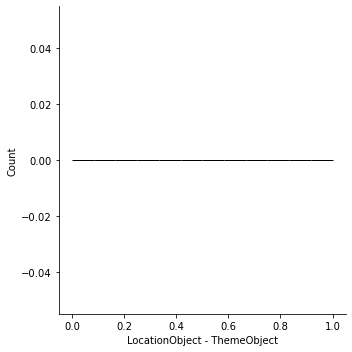

In [89]:
sns.displot(item_differences, bins=12)

In [90]:
item_differences.sort_values(ascending=False)

item_id  item_key                  T mass?  scale type
1.0      cram clothes              True     fill         NaN
4.0      dab ointment              True     cover        NaN
9.0      heap appetizers           False    cover        NaN
10.0     inject jelly              True     fill         NaN
12.0     load hay                  True     fill         NaN
14.0     pack soil                 True     fill         NaN
16.0     plant lavender seedlings  False    cover        NaN
19.0     rub marinade              True     cover        NaN
25.0     slather mayonnaise        True     cover        NaN
26.0     smear grease              True     cover        NaN
32.0     spray paint               True     cover        NaN
34.0     sprinkle nuts             False    cover        NaN
35.0     squirt water              True     cover        NaN
36.0     stack books               False    fill         NaN
41.0     stuff money               True     fill         NaN
Name: LocationObject - ThemeOb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'cram clothes'),
  Text(1, 0, 'dab ointment'),
  Text(2, 0, 'heap appetizers'),
  Text(3, 0, 'inject jelly'),
  Text(4, 0, 'load hay'),
  Text(5, 0, 'pack soil'),
  Text(6, 0, 'plant lavender seedlings'),
  Text(7, 0, 'rub marinade'),
  Text(8, 0, 'slather mayonnaise'),
  Text(9, 0, 'smear grease'),
  Text(10, 0, 'spray paint'),
  Text(11, 0, 'sprinkle nuts'),
  Text(12, 0, 'squirt water'),
  Text(13, 0, 'stack books'),
  Text(14, 0, 'stuff money')])

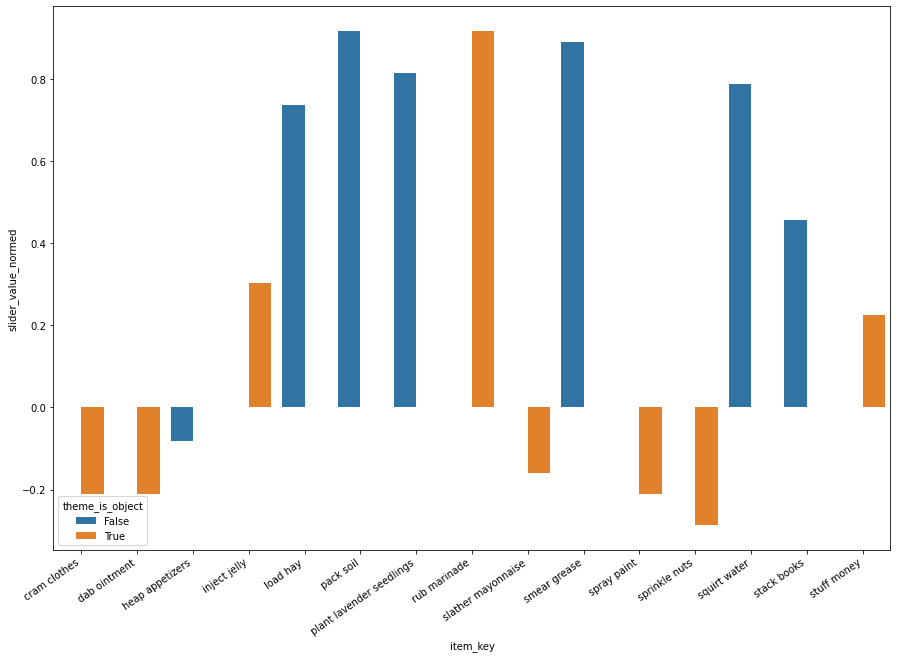

In [91]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="item_key", hue="theme_is_object", y="slider_value_normed",
            order=item_differences.sort_values().index.get_level_values("item_key"))
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='T mass?', ylabel='LocationObject - ThemeObject'>

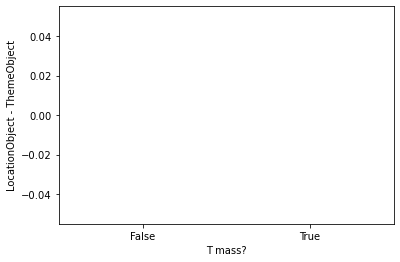

In [92]:
sns.barplot(data=item_differences.reset_index(), x="T mass?", y="LocationObject - ThemeObject")

### By scale type

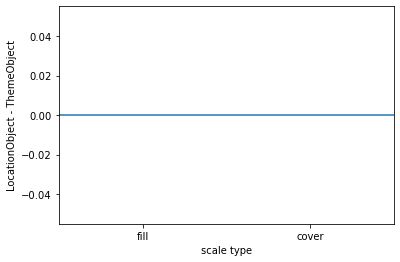

In [93]:
ax = sns.swarmplot(data=item_differences.reset_index(), x="scale type", y="LocationObject - ThemeObject")
ax.axhline(0)

### Bootstrap check

In [94]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [95]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [96]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [97]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [98]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [99]:
copouts = merged_df.groupby(["materials_id", "item_id", "theme_is_object"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "theme_is_object"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

,slider_copout,sum,count,mean
item_id,theme_is_object,,,
1.0,True,0,1,0.0
4.0,True,0,1,0.0
9.0,False,0,1,0.0
10.0,True,0,1,0.0
12.0,False,0,1,0.0
14.0,False,0,1,0.0
16.0,False,0,1,0.0
19.0,True,0,1,0.0
25.0,True,0,1,0.0


<AxesSubplot:xlabel='item_key', ylabel='slider_copout'>

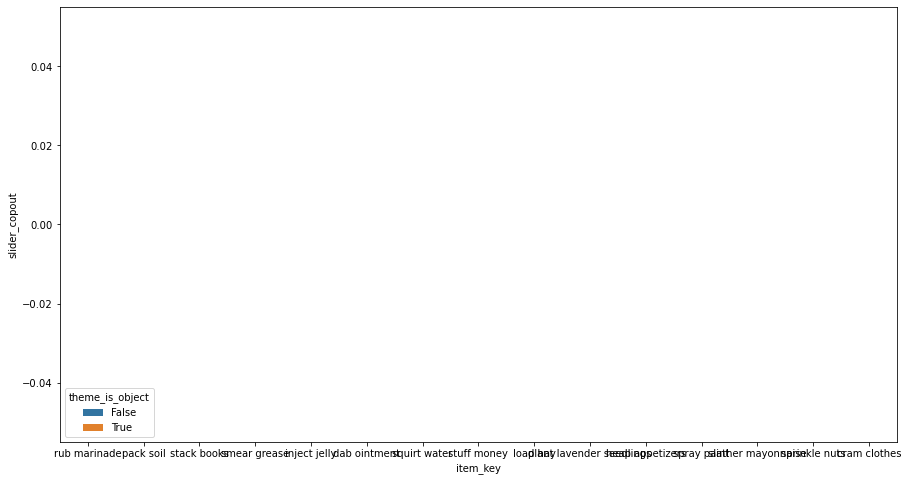

In [100]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="item_key", y="slider_copout", hue="theme_is_object")

<AxesSubplot:xlabel='T mass?', ylabel='slider_copout'>

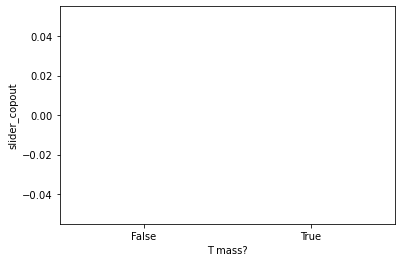

In [101]:
sns.barplot(data=merged_df, x="T mass?", y="slider_copout")

## Basic analysis: image trials

In [110]:
image_response_df[["theme_is_object", "response"]]

,,theme_is_object,response
trial_index,uniqueid,,
4,debugWG3ZVM:debugBDB6GC,False,max
7,debugWG3ZVM:debugBDB6GC,False,min
10,debugWG3ZVM:debugBDB6GC,True,min
15,debugWG3ZVM:debugBDB6GC,False,max
21,debugWG3ZVM:debugBDB6GC,False,max
25,debugWG3ZVM:debugBDB6GC,True,min
38,debugWG3ZVM:debugBDB6GC,True,min


<AxesSubplot:xlabel='theme_is_object', ylabel='chose_max'>

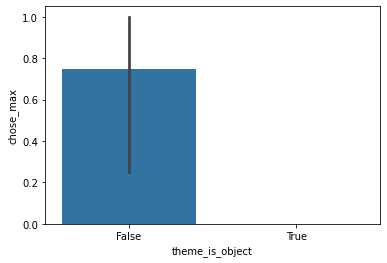

In [112]:
image_response_df["chose_max"] = image_response_df["response"] == "max"
sns.barplot(data=image_response_df.reset_index(), x="theme_is_object", y="chose_max")

## Item exposure

In [103]:
merged_df.groupby(["item_id", "item_key", "theme_is_object"]).size().sort_values().head(20)

item_id  item_key                  theme_is_object
1.0      cram clothes              True               1
4.0      dab ointment              True               1
9.0      heap appetizers           False              1
10.0     inject jelly              True               1
12.0     load hay                  False              1
14.0     pack soil                 False              1
16.0     plant lavender seedlings  False              1
19.0     rub marinade              True               1
25.0     slather mayonnaise        True               1
26.0     smear grease              False              1
32.0     spray paint               True               1
34.0     sprinkle nuts             True               1
35.0     squirt water              False              1
36.0     stack books               False              1
41.0     stuff money               True               1
dtype: int64